# Spam Classification using Scikit learn (NLP)

### Libraries

In [1]:
from operator import lshift
import pandas as pd
import numpy as np

#Text processing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy
import string

#scikit learn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline 

#modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#Model Evaluation
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AdBeynu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#dataset
data = pd.read_csv('spam_ham_dataset.csv', encoding = 'ISO 8859-15')
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## Target data, y

In [4]:
y = data['label'] #target
y.shape

(5171,)

### Label encoding the target, y

In [5]:
lb_encod = LabelEncoder()
y = lb_encod.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 1])

### Vectorizing Categories, X

In [6]:
data['text'].str.lower()

0       subject: enron methanol ; meter # : 988291\r\n...
1       subject: hpl nom for january 9 , 2001\r\n( see...
2       subject: neon retreat\r\nho ho ho , we ' re ar...
3       subject: photoshop , windows , office . cheap ...
4       subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    subject: put the 10 on the ft\r\nthe transport...
5167    subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    subject: calpine daily gas nomination\r\n>\r\n...
5169    subject: industrial worksheets for august 2000...
5170    subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

## Text Processing

In [7]:
#download punctuation package
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AdBeynu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
#download wordnet package
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AdBeynu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
#punctuations
punctuations = string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in punctuations])
    return punctuationfree

In [10]:
 #storing the puntuation free text
clean_data = data['text'].apply(lambda x:remove_punctuation(x))
#clean_data.head()

### Remove stop words

In [11]:
 def remove_stopwords(txt):
        stoplist = nltk.corpus.stopwords.words('english')
        output =' '.join([word for word in txt.split() if word not in stoplist])
        return output

In [28]:
##applying the stopword function

X = clean_data.apply(lambda x:remove_stopwords(x))
#X.head()

### Vectorizing the categories, X

In [13]:
count_vect = CountVectorizer()
X = count_vect.fit_transform(X)
X.shape

(5171, 50342)

### Training a classifier

In [14]:
X, y = make_classification(n_samples=5171, n_features=4, n_informative=2, n_redundant=0,random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [15]:
# features_test_data = 20%(X); target_test_data = 20%(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42, stratify=y, shuffle=True,)

In [16]:
#faire du tuning (recherche des hyperparamètres du classifier RandomForest)    
param_grid = {
    'model__criterion': ["gini", "entropy"],
    'model__n_estimators': [90, 100, 115, 130],}
 
transformer_num = None

In [17]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=2, random_state=0),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__n_estimators': [90, 100, 115, 130]})

In [18]:
pipe = Pipeline(steps=[('transformer', transformer_num),('model', RandomForestClassifier())])
pipe

Pipeline(steps=[('transformer', None), ('model', RandomForestClassifier())])

In [19]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer', None), ('model', RandomForestClassifier())])

In [20]:
rf_train=pipe.score(X_train, y_train)
rf_test=pipe.score(X_test, y_test)

In [21]:
print(rf_train * 100)
print(rf_test * 100)

100.0
90.91787439613526


In [22]:
predicted = pipe.predict(X_test)
predicted.shape

(1035,)

In [23]:
np.mean(predicted == y_test)

0.9091787439613527

### Matrix Confusion

In [24]:
#Matrix confusion
from sklearn import metrics
metrics.confusion_matrix(y_test, predicted)

array([[463,  54],
       [ 40, 478]], dtype=int64)

### Plotting matrix Confusion

C:\Users\AdBeynu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


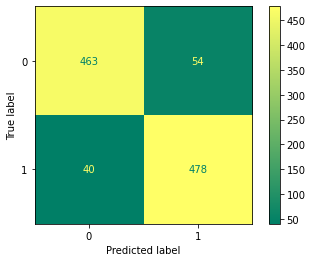

In [25]:
plot_confusion_matrix(pipe, X_test, y_test,cmap=plt.cm.summer,normalize=None)

### Matrics Evaluation

In [26]:

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       517
           1       0.90      0.92      0.91       518

    accuracy                           0.91      1035
   macro avg       0.91      0.91      0.91      1035
weighted avg       0.91      0.91      0.91      1035

